# Welcome to K-NN_Classifier supervised Learining Algorithm
K Nearest Neighbour

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
# MinMaxScaller is used for preprocessing, scaling, normalization, and changing continuous variable to categorical variable
# train_test_split will be used to split the data into train, test and validate dataset
# linear model has all the models for regression. 
# neighbours module has KNN implementation
# metrics module has classes for evaluation techniques

In [3]:
data = pd.read_csv('KNN-data/data_cleaned.csv')

In [4]:
data

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.000000,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.000000,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.000000,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.000000,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
887,1,19.000000,30.0000,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
888,0,29.699118,23.4500,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
889,1,26.000000,30.0000,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0


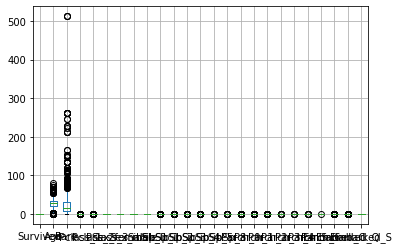

In [5]:
data.boxplot()

In [7]:
data.shape

(891, 25)

In [8]:
Y = data['Survived']

In [9]:
X = data.drop(['Survived'], axis = 1)
X

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,7.2500,0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,38.000000,71.2833,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,26.000000,7.9250,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,35.000000,53.1000,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,35.000000,8.0500,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,13.0000,0,1,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
887,19.000000,30.0000,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
888,29.699118,23.4500,0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
889,26.000000,30.0000,1,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [10]:
minMAx = MinMaxScaler()
X_scaled = minMAx.fit_transform(X)

In [11]:
X = pd.DataFrame(X_scaled, columns=X.columns)

In [12]:
x_train,x_test, y_train, y_test = train_test_split(X,Y,random_state=56, stratify = Y)


In [13]:
x_train

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
40,0.497361,0.018494,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13,0.484795,0.061045,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
547,0.367921,0.027058,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
312,0.321438,0.050749,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75,0.308872,0.014932,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,0.497361,0.015412,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
740,0.367921,0.058556,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
648,0.367921,0.014737,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
255,0.359135,0.029758,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
x_test

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
560,0.367921,0.015127,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
582,0.673285,0.050749,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
546,0.233476,0.050749,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
575,0.233476,0.028302,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
460,0.597889,0.051822,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.296306,0.154588,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
344,0.447097,0.025374,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
551,0.334004,0.050749,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
382,0.396833,0.015469,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
y_train

40     0
13     0
547    1
312    0
75     0
      ..
561    0
740    1
648    0
255    1
6      0
Name: Survived, Length: 668, dtype: int64

In [16]:
y_test

560    0
582    0
546    1
575    0
460    1
      ..
139    0
344    0
551    0
382    0
274    1
Name: Survived, Length: 223, dtype: int64

In [17]:
knn =KNeighborsClassifier(n_neighbors=10)

In [18]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [19]:
test_pred = knn.predict(x_test)
my_f1_score = f1_score(test_pred, y_test)

In [20]:
my_f1_score

0.6956521739130435

In [21]:
def getF1Score(i, x_train, y_train, x_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    my_f1_score = f1_score(pred, y_test)
    return my_f1_score

In [22]:
def getOptimal(x_train, y_train, x_test, y_test):
    lst = []
    index  = 0
    for i in range(6,20,1):
        lst.append(1-getF1Score(i, x_train, y_train, x_test, y_test))
    
    return lst
        

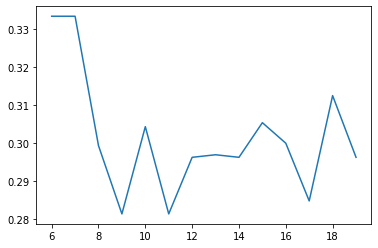

In [23]:
plt.plot(range(6,20,1),getOptimal(x_train, y_train, x_test, y_test))

# Overfitting and underfitting

In [36]:
def model_clf(i, x_train, y_train, x_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    pred_train = knn.predict(x_train)
    test_f1_score = f1_score(pred, y_test)
    train_f1_score = f1_score(pred_train, y_train)
    return test_f1_score, train_f1_score

In [37]:
model_clf(10, x_train, y_train, x_test, y_test)

(0.6956521739130435, 0.7619047619047619)

In [38]:
def getOptimal1(x_train, y_train, x_test, y_test):
    train_lst = []
    test_lst = []
    index  = 0
    for i in range(6,40,1):
        test_f1, train_f1 = model_clf(i, x_train, y_train, x_test, y_test)
        test_lst.append(1-test_f1)
        train_lst.append(1-train_f1)
    
    return train_lst, test_lst


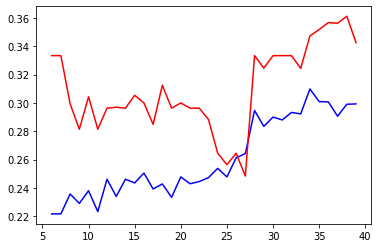

In [39]:
train_lst, test_lst = getOptimal1(x_train, y_train, x_test, y_test)

plt.plot(range(6,40,1), train_lst, color='blue', label ='train')
plt.plot(range(6,40,1), test_lst, color='red', label ='test')